In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#nltk.download()

In [3]:
train_df = pd.read_csv("D:/PythonSamples/Mercari/train.tsv", sep='\t', header=0,engine="python")

In [4]:
test_df = pd.read_csv("D:/PythonSamples/Mercari/test.tsv", sep='\t', header=0,engine="python")

In [5]:
len(train_df),len(test_df)

(1482535, 693359)

In [6]:
train_df.isnull().sum() , test_df.isnull().sum()

(train_id                  0
 name                      0
 item_condition_id         0
 category_name          6327
 brand_name           632682
 price                     0
 shipping                  0
 item_description          4
 dtype: int64, test_id                   0
 name                      0
 item_condition_id         0
 category_name          3058
 brand_name           295525
 shipping                  0
 item_description          0
 dtype: int64)

In [7]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [8]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [9]:
train_df['category_name'].fillna('NoValue', inplace=True)

In [10]:
train_df['brand_name'].fillna('NoValue', inplace=True)

In [11]:
train_df['item_description'].fillna('NoValue', inplace=True)

In [12]:
train_df = train_df[train_df['price'] != 0.0]

In [13]:
test_df['price'] = 999999.00 

In [14]:
test_df = test_df[['test_id','name','item_condition_id','category_name','brand_name','shipping','item_description','price']]

In [15]:
test_df['category_name'].fillna('NoValue', inplace=True)

In [16]:
test_df['brand_name'].fillna('NoValue', inplace=True)

In [17]:
x = train_df[['category_name','name']]
y = test_df[['category_name','name']]

In [18]:
category_df = x
category_df = category_df.append(y)

In [19]:
len(category_df), category_df.isnull().sum()


(2175020, category_name    0
 name             0
 dtype: int64)

In [20]:
category_df['name'] = category_df['name'].astype(str).str.split(' ').apply(list)

In [21]:
category_ref = category_df.groupby('category_name')['name'].apply(list)

In [22]:
category_ref_df = pd.DataFrame({'category_name':category_ref.index, 'name':category_ref.values}) 

In [23]:
def flattenlistname(row):
    listoflist = row['name']
    #finallist = reduce(lambda x,y: x+y,listoflist)
    finallist = ' '.join(str(r) for v in listoflist for r in v)
    #print(row['category_name'])
    return finallist

In [24]:
category_ref_df['name'] = category_ref_df.apply(flattenlistname, axis = 1)

In [25]:
category_ref_df['name'] = category_ref_df['name'].str.lower()

In [26]:
def removeDupl(text):
    #print(text)
    list_ = re.sub('[^A-Za-z ]+', '',text)
    list_val = list_.split(' ')
    #print(list_val)
    finallist = list(set(list_val))
    #print(finallist)
    #final = finallist#[re.sub('[^a-zA-Z0-9]+', '', _) for _ in finallist]
    #print(final)
    #final_list = list(filter(None, final))
    final_list1 = []
    for i in finallist:
        #print(i)
        if len(i) > 1:
            final_list1.append(i)
    return final_list1

In [27]:
category_ref_df['name'] = category_ref_df['name'].apply(lambda x: removeDupl(x))

In [28]:
def cleanUnwantedDesc(row):
    item_desc = str(row)
    item_desc = re.sub('[^A-Za-z ]+', '',item_desc)
    tokens = nltk.word_tokenize(item_desc)
    tokens
    tagged = nltk.pos_tag(tokens)
    cleansed = ''
    for v,k in tagged:
        if k == 'NN' or k == 'NNP' or k == 'NNPS' or k == 'NNS':
            cleansed=cleansed+v+' '
    return cleansed.rstrip().split()

In [29]:
category_ref_df['name'] = category_ref_df['name'].apply(lambda x: cleanUnwantedDesc(x))

In [30]:
category_ref_df = category_ref_df[category_ref_df.category_name != 'NoValue']

In [31]:
category_ref_df.head()

,category_name,name
0,Beauty/Bath & Body/Bath,"[starfruit, vibe, scents, tennis, santa, bg, t..."
1,Beauty/Bath & Body/Bathing Accessories,"[toddler, box, jess, hold, omalley, child, bas..."
2,Beauty/Bath & Body/Cleansers,"[boys, conditioner, stores, cooler, sands, box..."
3,Beauty/Bath & Body/Other,"[conditioner, itworks, trial, box, pellets, an..."
4,Beauty/Bath & Body/Scrubs & Body Treatments,"[applicator, waxes, conditioner, base, washscr..."


In [32]:
category_ref_df.loc[category_ref_df['category_name'] == 'NoValue']

,category_name,name


orgnizing the same to item descriptions column

In [33]:
M = train_df[['category_name','item_description']]
N = test_df[['category_name','item_description']]
category_des_df = M
category_des_df = category_des_df.append(N)

In [34]:
category_des_df.isnull().sum()

category_name       0
item_description    0
dtype: int64

category_des_df['item_description'].fillna('-', inplace=True)

In [35]:
category_des_df['item_description'] = category_des_df['item_description'].astype(str).str.split(' ').apply(list)

In [36]:
category_des_ref = category_des_df.groupby('category_name')['item_description'].apply(list)

In [37]:
category_des_ref_df = pd.DataFrame({'category_name':category_des_ref.index, 'item_description':category_des_ref.values})

In [38]:
def flattenlist(row):
    listoflist = row['item_description']
    #finallist = reduce(lambda x,y: x+y,listoflist)
    finallist = ' '.join(str(r) for v in listoflist for r in v)
    #print(row['category_name'])
    return finallist

In [39]:
category_des_ref_df['item_description'] = category_des_ref_df.apply(flattenlist, axis = 1)

In [40]:
category_des_ref_df['item_description'] = category_des_ref_df['item_description'].str.lower()

In [41]:
category_des_ref_df['item_description'] = category_des_ref_df['item_description'].apply(lambda x: removeDupl(x))

In [42]:
category_des_ref_df['item_description'] = category_des_ref_df['item_description'].apply(lambda x: cleanUnwantedDesc(x))

In [43]:
category_des_ref_df = category_des_ref_df[category_des_ref_df.category_name != 'NoValue']

In [212]:
b_x = train_df['brand_name']
b_y = test_df['brand_name']

brands = b_x
brands = brands.append(b_y)

In [213]:
brands = pd.DataFrame(brands)

In [214]:
brands = brands.dropna(axis=0, how='any').drop_duplicates(subset=None, keep='first', inplace=False)

In [215]:
brands = brands[brands.brand_name != 'NoValue']

In [225]:
brands_t = pd.DataFrame(brands['brand_name'].str.split('&&&').apply(list))

In [226]:
brands_t

,brand_name
1,[Razer]
2,[Target]
6,[Acacia Swimwear]
7,[Soffe]
8,[Nike]
10,[Smashbox]
11,[Victoria's Secret]
12,[rue]
13,[Scholastic]
14,[UGG Australia]


In [47]:
def findmatch(list_v):
    wval = list_v['category_name']
    if wval == 'NoValue':
        #'Men\'s All Black Low Top Converse'#'Lularoe XS Carly Dress'#'(5) Nike boys t-shirts size 6'##'Bundle for Vanessa Wieseler
        wval = wval.lower().split(' ')
        fnl = {}
        fnl_list = {}
        
        for index, row in category_ref_df.iterrows():
            fnl[row['category_name']] = str(len(list(set(wval) & set(row['name']))))
       
        for k,v in fnl.items():
            if v == max(fnl.values()):
                fnl_list[k] = v
                
        for i in range(len(fnl_list)):
            
            print(list_v['train_id'])
            if len(fnl_list) > 1:
                return 'Other/Other/Other'
            else:
                for ke,va in fnl_list.items():
                    return str(ke)
    else:
        return str(wval)

In [34]:
train_df_cat = train_df

In [37]:
train_df_cat[train_df_cat.category_name == 'NoValue'].head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
122,122,Bundle,3,NoValue,NoValue,59.0,0,Sizes and info of clothes can be found on thei...
155,155,3 Nora Roberts Books,3,NoValue,NoValue,10.0,1,For aferg16.
258,258,ACER Laptop,5,NoValue,NoValue,14.0,0,"Powers on, no screen display, no external dama..."
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NoValue,Michael Kors,18.0,0,No description yet
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NoValue,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ..."
1274,1274,Black Ribbed Off-the-Shoulder Crop Top,2,NoValue,Urban Outfitters,15.0,0,From the silence + noise brand sold at Urban O...
1320,1320,Nice Condition Pet Escort,2,NoValue,PetSafe,12.0,0,Nice condition I will wipe down before selling
1419,1419,3 Toy Bundle,1,NoValue,NoValue,34.0,0,"* brand new/NIB * ** price firm, no free shipp..."
1491,1491,Baby Sign,3,NoValue,NoValue,3.0,1,Magnetic baby sign
1521,1521,Nolan Ryan Patch Baseball Card,2,NoValue,NoValue,3.0,1,No description yet


In [61]:
import spacy
def findcategory(list_v):
    catval = list_v['category_name']
    if catval == 'NoValue':
        nlp = spacy.load('en')
        wval = list_v['name']
        print(list_v['train_id'])
        wval = wval.lower()#.split(' ')
        fnl = {}
        fnl_list = {}
        for index, row in category_ref_df.iterrows():
            c1 = nlp(wval)
            c2 = ' '.join(str(v) for v in row['name']) 
            c2 = nlp(c2)
            #print('^^^^^^^^^^^^^^^^^')
            #print(c1)
            #print(row['category_name'])
            #print('----------------')
            resu = c1.similarity(c2)
            #print(resu)
            fnl[row['category_name']] = resu
        for k,v in fnl.items():
            if v == max(fnl.values()):
                list_v['category_name'] = str(k)
    else:
        list_v['category_name'] = str(catval)
        
    return list_v

In [57]:
#max(fnl.values())

In [59]:
#train_df_cat['category_name'] = train_df_cat.apply(findcategory, axis = 1)

In [ ]:
import multiprocessing as mp
import pandas.util.testing as pdt

def process(df):
    res = df.apply(findcategory, axis=1)
    return res

p = mp.Pool(processes=8)
split_dfs = np.array_split(train_df_cat,8)
pool_results = p.map(process, split_dfs)
p.close()
p.join()

# merging parts processed by different processes
parts = pd.concat(pool_results, axis=0)

# merging newly calculated parts to big_df
big_df = pd.concat([big_df, parts], axis=1)

# checking if the dfs were merged correctly
#pdt.assert_series_equal(parts['id'], big_df['id'])

In [51]:
train_df_cat.to_csv("D:/PythonSamples/Mercari/train_df_cat.tsv", sep='\t')

In [294]:
train_df_cat_con = train_df_cat[['train_id','name','item_condition_id','category_name','brand_name','shipping','item_description','price']]

In [293]:
import re
def findbrand(row):
    name = row['name']
    item_name = row['item_description']
    combined = name+' '+item_name
    if row['brand_name'] == 'NoValue':
        coun_list = []
        for ind,i in brands_t.iterrows():
            var = " ".join(str(x) for x in i['brand_name'])
            if re.search(var, combined):
                coun_list.append(str(var))
            else:
                return 'Others'
        if len(coun_list) == 1:
            return str(count_list)
        else:
            return 'Others'    
    else:
        return str(row['brand_name'])

In [295]:
train_df_cat_con['brand_name'] = train_df_cat_con.apply(findbrand, axis = 1)

In [296]:
train_df_cat_con['brand_name']

0                     Others
1                      Razer
2                     Target
3                     Others
4                     Others
5                     Others
6            Acacia Swimwear
7                      Soffe
8                       Nike
9                     Others
10                  Smashbox
11         Victoria's Secret
12                       rue
13                Scholastic
14             UGG Australia
15                     Tarte
16                Wet n Wild
17                    Others
18                 Too Faced
19             Anthropologie
20                    Torrid
21         Victoria's Secret
22                   Samsung
23                    Others
24                FOREVER 21
25                Air Jordan
26                     Apple
27                   LuLaRoe
28                FOREVER 21
29                 Hollister
                 ...        
1482505       The North Face
1482506           KitchenAid
1482507               Others
1482508    Vic

In [297]:
train_df_cat_scl = train_df_cat_con[['item_condition_id','category_name','brand_name','shipping','price']]

In [298]:
train_df_cat_scl['category_name'] = pd.Categorical.from_array(train_df_cat_scl.category_name).labels

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
train_df_cat_scl['brand_name'] = pd.Categorical.from_array(train_df_cat_scl.brand_name).labels

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [300]:
train_df_cat_scl.head()

,item_condition_id,category_name,brand_name,shipping,price
0,3,808,3198,1,10.0
1,3,86,3558,0,52.0
2,1,1254,4181,1,10.0
3,1,485,3198,1,35.0
4,1,1181,3198,0,44.0


In [57]:
from sklearn.cross_validation import train_test_split

C:\Users\hdadmin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
#dtrain, dvalid = train_test_split(train_df_cat_scl, random_state=123, train_size=0.99)

In [250]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [254]:
# Split the data into training/testing sets
X_train = train_df_cat_scl[:-100000]
X_test = train_df_cat_scl[-100000:]

dtrain_X_train = X_train[['item_condition_id','category_name','brand_name','shipping','price']]
dvalid_X_test =  X_test[['item_condition_id','category_name','brand_name','shipping','price']]

# Split the targets into training/testing sets
#dtrain_y_train = X_train[['price']]
#dvalid_y_test = X_test[['price']]

In [255]:
#dtrain_y_train#dvalid_y_test

In [256]:
scaler = MinMaxScaler(feature_range=(0,1))

In [257]:
scaled_data = scaler.fit_transform(dtrain_X_train)
scaled_test = scaler.transform(dvalid_X_test)

In [258]:
print("multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[4],scaler.min_[4]))

multiplying by 0.0004977601 and adding 0.000000


In [264]:
dtrain_X_train_scl = dtrain_X_train[['item_condition_id','category_name','brand_name','shipping']]
dvalid_X_test_scl =  dvalid_X_test[['item_condition_id','category_name','brand_name','shipping']]

# Split the targets into training/testing sets
dtrain_y_train_scl = dtrain_X_train[['price']]
dvalid_y_test_scl = dvalid_X_test[['price']]

In [265]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dtrain_X_train_scl, dtrain_y_train_scl)

# Make predictions using the testing set
dvalid_y_pred_scl = regr.predict(dvalid_X_test_scl)



In [261]:
dvalid_X_test.shape,dvalid_y_test.shape

((100000, 5), (100000, 1))

In [266]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(dvalid_y_test_scl, dvalid_y_pred_scl))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(dvalid_y_test_scl, dvalid_y_pred_scl))



Coefficients: 
 [[ -1.74366257e+00   2.05433695e-03   9.07906055e+00  -6.65609950e+00]]
Mean squared error: 1436.67
Variance score: 0.02


In [273]:
prediction_upscale = dvalid_y_pred_scl+0.000000
prediction_upscale = prediction_upscale/0.0004977601
len(prediction_upscale)

100000

In [274]:
Y_rush_dep_te_Act = dvalid_y_test_scl+0.000000
Y_rush_dep_te_Act = Y_rush_dep_te_Act/0.0004977601
len(Y_rush_dep_te_Act)

100000

In [275]:
def rmsle(Y, Y_pred):
    assert Y.shape == Y_pred.shape
    return np.sqrt(np.mean(np.square(Y_pred - Y )))

In [282]:
rmsle(dvalid_y_test_scl, dvalid_y_pred_scl)

price    37.903475
dtype: float64

In [277]:
Y_rush_dep_te_Act

,price
1382535,38170.998439
1382536,108485.995563
1382537,22098.999096
1382538,20089.999178
1382539,50224.997946
1382540,92413.996220
1382541,30134.998767
1382542,10044.999589
1382543,20089.999178
1382544,28125.998850


In [271]:
prediction_upscale

array([[ inf],
       [ inf],
       [ inf],
       ..., 
       [ inf],
       [ inf],
       [ inf]])

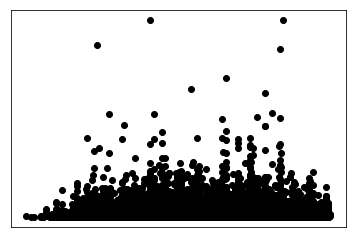

In [187]:
# Plot outputs
plt.scatter(dvalid_y_pred, dvalid_y_test,  color='black')
#plt.plot(dvalid_y_pred,dvalid_y_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [188]:
pred = pd.DataFrame(dvalid_y_pred)
actu = pd.DataFrame(dvalid_y_test)

In [192]:
#actu

In [121]:
test_df_cat = test_df

In [123]:
def findmatchtest(list_v):
    wval = list_v['category_name']
    if wval == 'NoValue':
        #'Men\'s All Black Low Top Converse'#'Lularoe XS Carly Dress'#'(5) Nike boys t-shirts size 6'##'Bundle for Vanessa Wieseler
        wval = wval.lower().split(' ')
        fnl = {}
        fnl_list = {}
        
        for index, row in category_ref_df.iterrows():
            fnl[row['category_name']] = str(len(list(set(wval) & set(row['name']))))
       
        for k,v in fnl.items():
            if v == max(fnl.values()):
                fnl_list[k] = v
                
        for i in range(len(fnl_list)):
            
            print(list_v['test_id'])
            if len(fnl_list) > 1:
                return 'Other/Other/Other'
            else:
                for ke,va in fnl_list.items():
                    return str(ke)
    else:
        return str(wval)

In [125]:
test_df_cat['category_name'] = test_df_cat.apply(findmatchtest, axis = 1)

217
555
702
1110
1476
1586
1983
2317
2376
2508
2545
2797
2848
2936
2937
3128
3184
3977
4083
4655
4751
4887
6102
6304
6926
7004
7016
7301
7345
7396
7635
8174
8619
8840
9705
10055
10097
10113
10738
10976
11047
11163
11210
11250
11814
11999
12007
12165
12361
12510
12993
13178
13498
13524
13730
13932
14004
14624
14728
14744
14762
14774
15071
15589
15918
16102
16121
16258
16308
16428
16526
16534
16590
16927
17018
17028
17244
17377
17404
17909
17979
17980
17992
19054
19148
19541
19927
20892
20993
21068
21107
21179
21635
21680
21760
21986
22113
22180
22394
22618
23257
23395
23430
23663
23689
23695
24064
24122
24373
24376
24444
24462
24865
24887
24930
24966
25114
25139
25175
25179
25372
25584
25637
25869
26000
26332
26335
26361
26575
26655
26891
26904
26931
27012
27600
27989
28190
28247
28273
28743
28895
28993
29401
29854
30156
30299
30453
30810
31114
31141
31144
31152
31158
31513
31623
31643
31656
31761
32762
32906
33194
33295
33434
34596
35250
35372
35644
35741
35909
36085
36089
36267
36596


284132
284827
284840
284893
285008
285031
286435
287093
287327
287469
287473
287555
287745
287955
287967
288210
288317
288369
288491
288528
288835
289983
290009
290386
290889
291005
291135
291219
291384
291426
291704
292029
292170
292265
292273
292312
292383
292513
292630
292659
292723
293453
293542
294085
294164
294204
294640
294853
295060
295163
295580
295596
295719
295985
296037
296564
296608
296612
296673
296886
297091
297130
297449
297552
297843
299071
299599
299663
299990
300356
300451
300882
301022
301622
301847
301935
302452
302550
303078
303399
303490
303604
303733
304537
304724
304952
305109
305202
305662
305840
305902
306150
306680
306713
306839
307517
307640
307734
307792
307839
307944
308236
308393
308446
308469
308600
308757
308921
308963
309529
309667
309701
310054
310121
310145
310246
310559
310733
310874
310988
311059
311128
311341
311383
311457
311601
311602
311779
311876
311955
312321
312801
313094
313181
313385
313389
313480
313563
313565
313762
313888
314008
314220

547173
547426
547451
547517
547742
547745
548268
548356
548372
548493
548722
549341
549556
551020
551642
551670
551828
552162
552297
552428
552533
552572
552737
553566
553923
554018
554232
554439
554569
554634
554947
555049
555183
555364
555402
555407
555567
555569
555965
556121
556219
556228
556287
556347
556427
557115
557294
557471
557748
557858
558308
558536
558858
558967
559306
559445
559836
560566
560659
560968
561461
561773
562267
562461
562600
562723
562744
562868
562987
563153
563504
564029
564301
564377
564554
565363
565723
565784
565891
566023
566185
566381
566451
566594
566657
566957
566959
567470
567473
567668
567848
568040
568176
568316
568384
568582
568685
568756
568824
569032
569347
569362
569507
569919
570295
570357
570562
570596
570747
570932
571076
571255
571316
571875
572387
572484
572644
573062
573345
573964
574247
574248
574303
574402
574538
574541
574645
574705
575019
575534
575771
575783
576188
576659
576772
576836
577261
577360
577550
578137
578315
579204
579319

In [128]:
test_df_cat.to_csv("D:/PythonSamples/Mercari/test_df_cat.tsv", sep='\t')

In [130]:
test_df_cat = test_df_cat[['test_id','name','item_condition_id','category_name','brand_name','shipping','item_description','price']]

In [131]:
test_df_cat_scl = test_df_cat[['item_condition_id','category_name','brand_name','shipping']]

In [132]:
test_df_cat_scl['category_name'] = pd.Categorical.from_array(test_df_cat_scl.category_name).labels

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
test_df_cat_scl['brand_name'] = pd.Categorical.from_array(test_df_cat_scl.brand_name).labels

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
test_df_cat_scl.head()

,item_condition_id,category_name,brand_name,shipping
0,1,1118,2491,1
1,1,825,2491,1
2,1,921,814,1
3,2,1169,2491,0
4,3,789,2491,1


In [135]:
# Make predictions using the testing set
test_pred = regr.predict(test_df_cat_scl)

ValueError: shapes (693359,4) and (5,) not aligned: 4 (dim 1) != 5 (dim 0)

In [ ]:
sub = pd.concat([df_test.id,preds],axis=1)

In [ ]:
sub.columns = ['test_id','price']

In [ ]:
sub.to_csv("D:/PythonSamples/Mercari/sample_submission.csv", index=False)

In [59]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

In [413]:
train_df_cat_scl = train_df_cat_scl[train_df_cat_scl['price'] != 0.0]

In [414]:
scaler = MinMaxScaler(feature_range=(0,1))

In [415]:
msk = np.random.rand(len(train_df_cat_scl)) < 0.8

Xtrain = train_df_cat_scl[msk]

Xtest = train_df_cat_scl[~msk]

In [416]:
scaled_data = scaler.fit_transform(Xtrain)
scaled_test = scaler.transform(Xtest)

In [417]:
print("multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[4],scaler.min_[4]))

multiplying by 0.0004985045 and adding -0.001496


In [418]:
X_rush_ind = np.array(pd.DataFrame(scaled_data).iloc[:,0:4])
Y_rush_dep = np.array(pd.DataFrame(scaled_data).iloc[:,4])

In [419]:
model = Sequential()
model.add(Dense(50, input_dim=4, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

In [420]:
model.fit(X_rush_ind,Y_rush_dep,epochs=50,shuffle=True,verbose=2)

Epoch 1/50
77s - loss: 3.5235e-04
Epoch 2/50
77s - loss: 3.4454e-04
Epoch 3/50
77s - loss: 3.4107e-04
Epoch 4/50
77s - loss: 3.3778e-04
Epoch 5/50
77s - loss: 3.3525e-04
Epoch 6/50
77s - loss: 3.3387e-04
Epoch 7/50
76s - loss: 3.3263e-04
Epoch 8/50
76s - loss: 3.3193e-04
Epoch 9/50
76s - loss: 3.3160e-04
Epoch 10/50
76s - loss: 3.3047e-04
Epoch 11/50
76s - loss: 3.3027e-04
Epoch 12/50
77s - loss: 3.2933e-04
Epoch 13/50
76s - loss: 3.2681e-04
Epoch 14/50
77s - loss: 3.2895e-04
Epoch 15/50
76s - loss: 3.2680e-04
Epoch 16/50
76s - loss: 3.2642e-04
Epoch 17/50
76s - loss: 3.2525e-04
Epoch 18/50
78s - loss: 3.2456e-04
Epoch 19/50
78s - loss: 3.2441e-04
Epoch 20/50
76s - loss: 3.2423e-04
Epoch 21/50
76s - loss: 3.2353e-04
Epoch 22/50
78s - loss: 3.2361e-04
Epoch 23/50
82s - loss: 3.2306e-04
Epoch 24/50
87s - loss: 3.2308e-04
Epoch 25/50
83s - loss: 3.2090e-04
Epoch 26/50
79s - loss: 3.2319e-04
Epoch 27/50
79s - loss: 3.2312e-04
Epoch 28/50
77s - loss: 3.2543e-04
Epoch 29/50
77s - loss: 3.228

In [ ]:
X_rush_ind_t = np.array(pd.DataFrame(scaled_test).iloc[:,0:4])
Y_rush_dep_t = np.array(pd.DataFrame(scaled_test).iloc[:,4])

In [396]:
test_error_rate = model.evaluate(X_rush_ind_t, Y_rush_dep_t, verbose=0)
print("the MSE for the test is: {} ".format(test_error_rate))

the MSE for the test is: 0.00030250611011020656 


In [397]:
#scaled_data_test = scaler.transform(dvalid)

In [398]:
#X_rush_ind_te=np.array(pd.DataFrame(scaled_data_test).iloc[:,0:4])
#Y_rush_dep_te=np.array(pd.DataFrame(scaled_data_test).iloc[:,4])
X_rush_ind_t=np.array(pd.DataFrame(scaled_test).iloc[:,0:4])
Y_rush_dep_t=np.array(pd.DataFrame(scaled_test).iloc[:,4])

In [399]:
Xnewtest = X_rush_ind_t

In [400]:
Xnewtest

array([[ 0.5       ,  0.68895801,  0.82300333,  1.        ],
       [ 0.25      ,  0.90279938,  0.99792013,  0.        ],
       [ 0.        ,  0.02255054,  0.89933444,  1.        ],
       ..., 
       [ 0.5       ,  0.02099533,  0.62541597,  0.        ],
       [ 0.25      ,  0.9059098 ,  0.34109817,  1.        ],
       [ 0.        ,  0.99222395,  0.66493344,  0.        ]])

In [401]:
prediction = model.predict(Xnewtest)

In [402]:
prediction_upscale = prediction+0.001496
prediction_upscale = prediction_upscale/0.0004985045
len(prediction_upscale)

295787

In [403]:
Y_rush_dep_te_Act = Y_rush_dep_t+0.001496
Y_rush_dep_te_Act = Y_rush_dep_te_Act/0.0004985045
len(Y_rush_dep_te_Act)

295787

In [404]:
pred = pd.DataFrame(prediction_upscale)
actu = pd.DataFrame(Y_rush_dep_te_Act)

In [405]:
pred,actu

(                 0
 0        23.072308
 1        37.510666
 2        19.863197
 3        18.545904
 4        18.966406
 5        19.005728
 6        19.090479
 7        18.967066
 8        24.742027
 9        25.821131
 10       16.650839
 11       26.712803
 12       28.604622
 13       25.424877
 14       52.325008
 15       25.899759
 16       30.104616
 17       20.257595
 18       35.504234
 19       22.160040
 20       25.216341
 21       24.838003
 22       48.197582
 23       17.385210
 24       32.958427
 25       40.606781
 26       33.476551
 27       52.929588
 28       15.947362
 29       27.171923
 ...            ...
 295757   26.017904
 295758   26.953327
 295759  127.385391
 295760   24.980427
 295761   29.503267
 295762   23.312788
 295763   19.272911
 295764   20.927258
 295765   15.258315
 295766   26.641495
 295767   21.953239
 295768   25.696686
 295769   25.881289
 295770   21.507860
 295771   32.284302
 295772   24.947527
 295773   18.797176
 295774   19.052130


In [ ]:
#merged = pd.merge(left=pred.astype(int), left_index=True,right=actu.astype(int), right_index=True,how='inner')

In [406]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    #assert len(y) == len(y_pred)
    #terms_to_sum = [(np.log(y_pred[i] + 1) - np.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    #return np.sqrt(sum(terms_to_sum) * (1.0/len(y))) #** 0.5
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y + 1)).mean())
    #part = sum((np.log(y_pred + 1) - np.log(y + 1))**2)
    #return part * (1.0/len(y))**0.5

In [407]:
rmsle(actu, pred)

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


0    0.717679
dtype: float64

In [1]:
import spacy

nlp = spacy.load('en')
doc1 = nlp(u'Hello hi there!')
doc2 = nlp(u'Hello hi there!')
doc3 = nlp(u'Hey whatsup?')

print(doc1.similarity(doc2)) # 0.999999954642
print(doc2.similarity(doc3)) # 0.699032527716
print(doc1.similarity(doc3))

1.00000008974
0.459109740008
0.459109740008
